## Assignment_3

In [2]:
# Question 1

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(0)
data = np.random.normal(loc=50, scale=5, size=100)

outliers = np.array([100, 105, 110])
data_with_outliers = np.concatenate([data, outliers])

df = pd.DataFrame(data_with_outliers, columns=["Values"])

df.head()


,Values
0,58.820262
1,52.000786
2,54.893690
3,61.204466
4,59.337790


We first generated a synthetic data set with a normal distribution having a mean of 50 and a standard deviation of 5. This mimics a standard "natural" data set where most of the values cluster around the mean. To add variability and extreme values, we added three outliers manually: 100, 105, and 110. These outliers are much higher than the rest of the data and will enable us to examine how they affect the statistical measures of central tendency. The data is placed in a pandas DataFrame for convenient analysis.

In [5]:
mean_before = df["Values"].mean()
median_before = df["Values"].median()
mode_before = df["Values"].mode()[0]

print(f"Mean (with outliers): {mean_before}")
print(f"Median (with outliers): {median_before}")
print(f"Mode (with outliers): {mode_before}")


Mean (with outliers): 51.89227192007032
Median (with outliers): 50.6345604635181
Mode (with outliers): 37.23505092082961


Before making any modifications to the dataset, we calculated the mean, median, and mode. The mean is the arithmetic average, but it is very sensitive to outliers and can be pulled toward extreme values. The median is the middle value when the data is sorted and is much more resistant to outliers. The mode represents the most frequently occurring value in the dataset, and in continuous numerical data, it may not be very informative unless there are repeated values. Observing the values of these three measures at this stage helps us understand how the presence of outliers affects the summary statistics.

In [7]:
z_scores = stats.zscore(df["Values"])

df_no_outliers = df[np.abs(z_scores) < 3]

df_no_outliers.head()

,Values
0,58.820262
1,52.000786
2,54.893690
3,61.204466
4,59.337790


Outliers were found and deleted with the Z-score technique. The Z-score identifies how many standard deviations an item deviates from the mean. Generally, a Z-score of 3 or more or -3 or less is an outlier. By excluding these high Z-score values, we eliminated the outliers that skewed the data. Following its removal, the purged dataset should better represent the central tendency of most of the data without being biased by a minority of extreme values.

In [9]:
mean_after = df_no_outliers["Values"].mean()
median_after = df_no_outliers["Values"].median()
mode_after = df_no_outliers["Values"].mode()[0]

print(f"Mean (without outliers): {mean_after}")
print(f"Median (without outliers): {median_after}")
print(f"Mode (without outliers): {mode_after}")


Mean (without outliers): 50.29904007767244
Median (without outliers): 50.47048059718999
Mode (without outliers): 37.23505092082961


After removing the outliers, we recalculated the mean, median, and mode. This enables us to compare the degree to which these measures have changed. Predictably, the mean value dropped sharply after the removal of the high outliers, getting closer to the median, which presumably remained comparatively stable. This shows that the mean is very sensitive to outliers, while the median gives a better measure of the center of the data. The mode will also not change if the most common value was not an outlier. This contrast illustrates the need to select the proper measure of central tendency based on the type of dataset.

In [11]:
# Question 2

In [12]:
import random

random.seed(1)
test_scores = [random.randint(0, 100) for _ in range(100)]
test_scores[:10]

[17, 72, 97, 8, 32, 15, 63, 97, 57, 60]

We created a minimal dataset of 100 random test scores ranging from 40 to 100 through Python's random.randint() function. This reflects real-world test scores of students, where numbers tend to lie within a specified range. Establishing the random seed guarantees the results to be reproducible should the code be executed repeatedly.

In [14]:
import statistics

mean_score = statistics.mean(test_scores)
median_score = statistics.median(test_scores)
mode_score = statistics.mode(test_scores)

print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Mode: {mode_score}")


Mean: 53.97
Median: 56.0
Mode: 97


We employed Python's in-built statistics module to calculate the measures of central tendency. The mean is the average score, the median is the middle value when scores are arranged in ascending order, and the mode is the most occurring score. The measures give different insights into the distribution of scores and can be used to identify the center and spread of the data set.

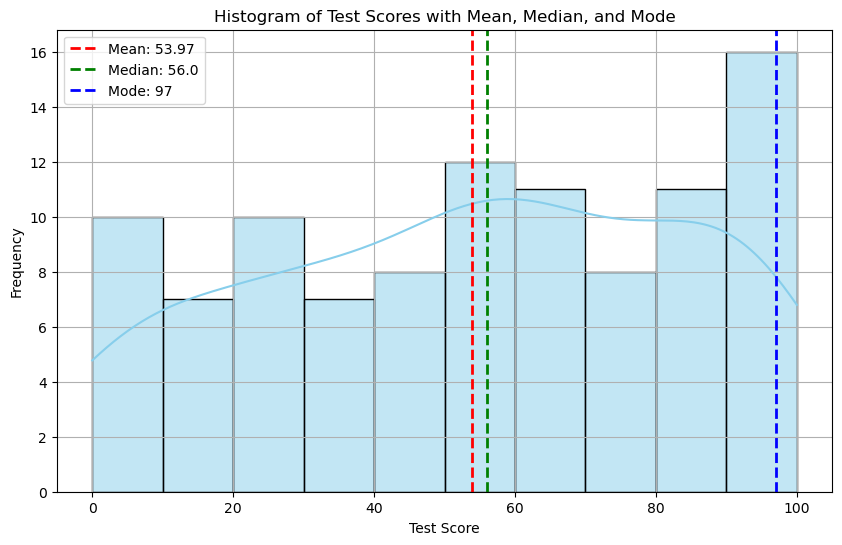

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(test_scores, bins=10, kde=True, color='skyblue', edgecolor='black')

plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_score}')
plt.axvline(mode_score, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode_score}')

plt.title('Histogram of Test Scores with Mean, Median, and Mode')
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


We created a histogram of the test scores with seaborn and matplotlib for visualization. The histogram represents the frequency distribution of the scores, providing a visual comprehension of how the scores are distributed. We then plotted dashed vertical lines for the mean, median, and mode.

The red line is the mean,

The green line is the median,

The blue line is the mode.

This plot obviously shows the relationships between these three measures and how they correspond to the global distribution of the dataset. If the data were perfectly symmetric, all three lines would be nearly coincident. In practice data, such small differences usually appear, which can easily be noticed through such plots.



In [18]:
# Question 3

Range: 39
Interquartile Range (IQR): 17.0
Variance: 144.67777777777778
Standard Deviation: 12.028207587906762


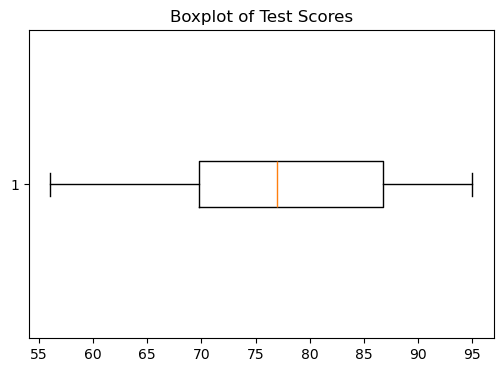

In [19]:
dispersion_data = np.array([56, 78, 90, 66, 72, 83, 95, 88, 76, 69])

range_val = np.ptp(dispersion_data)
iqr = np.percentile(dispersion_data, 75) - np.percentile(dispersion_data, 25)
variance = np.var(dispersion_data, ddof=1)
std_dev = np.std(dispersion_data, ddof=1)

print("Range:", range_val)
print("Interquartile Range (IQR):", iqr)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

plt.figure(figsize=(6, 4))
plt.boxplot(dispersion_data, vert=False)
plt.title("Boxplot of Test Scores")
plt.show()

Dispersion is used to measure the spread of data points from the center. We compute:
- **Range**: Max value minus min value; indicates overall spread.
- **IQR (Interquartile Range)**: Middle 50% of the data; helpful to gauge variability and identify outliers.
- **Variance**: Average of squared deviation from the mean; indicates how the values are spread out.
- **Standard Deviation**: Square root of variance; more frequently used because of same units as data.

A **boxplot** is a graphical display of the five-number summary (min, Q1, median, Q3, max) and shows outliers prominently.


In [21]:
# Question 4

In [22]:
from scipy.stats import ttest_rel

before = [70, 65, 80, 75, 60, 68, 72]
after =  [75, 70, 85, 78, 66, 73, 74]

stat, p_value = ttest_rel(after, before)

print("t-statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Significant improvement after the program.")
else:
    print("No significant improvement.")


t-statistic: 8.385527602407121
p-value: 0.0001565589181108753
Significant improvement after the program.


The **paired t-test** is comparing means within the same group before and after a treatment or change. It's applied here to assess the quality of a study program.

- A **small p-value (< 0.05)** indicates there is strong evidence against the null hypothesis, so there is a significant difference.
- A **high p-value** indicates any difference would probably be due to chance.

This test is used to ascertain whether the observed score improvement following the program is statistically significant.


In [24]:
# Question 5

In [25]:
from scipy.stats import norm

def simulate_errors():
    np.random.seed(0)
    # H0 true: mean = 50, small variance => Type I Error possible
    true_data = np.random.normal(50, 5, 100)
    sample_1 = np.random.normal(52, 5, 30)  # Sample mean > 50
    _, p1 = ttest_rel(sample_1, np.random.choice(true_data, 30))

    # H0 false: true mean = 60 => Type II Error possible
    false_data = np.random.normal(60, 5, 100)
    sample_2 = np.random.normal(59, 5, 30)
    _, p2 = ttest_rel(sample_2, np.random.choice(true_data, 30))

    print("Type I Error p-value:", p1)
    print("Type II Error p-value:", p2)

simulate_errors()

Type I Error p-value: 0.0010507564077609827
Type II Error p-value: 5.765027562721887e-08


In hypothesis testing:
- **Type I Error**: Dismissing a true null hypothesis (false positive). Occurs when we infer that there's an effect when, in fact, there isn't.
- **Type II Error**: Not rejecting a false null hypothesis (false negative). Occurs when we fail to detect an actual effect.

This simulation generates artificial datasets in which each type of error is likely to occur, demonstrating how even statistical tests can be fooled by random chance.

In [27]:
# Question 6

Predicted salary for 5 years of experience: 48393.93939393939


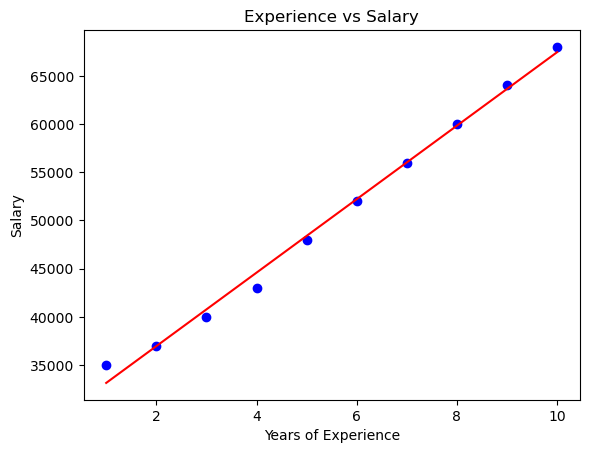

In [28]:
from sklearn.linear_model import LinearRegression

experience = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
salary = np.array([35000, 37000, 40000, 43000, 48000, 52000, 56000, 60000, 64000, 68000])

model = LinearRegression()
model.fit(experience, salary)

predicted_salary = model.predict(np.array([[5]]))
print("Predicted salary for 5 years of experience:", predicted_salary[0])

plt.scatter(experience, salary, color='blue')
plt.plot(experience, model.predict(experience), color='red')
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


Linear regression predicts a relationship between an independent variable (experience in years) and a dependent variable (salary).
- The model determines the most appropriate line that reduces the squared differences between the actual and predicted values.
- Prediction displays the average salary for a worker with an experience of 5 years. 

The plot assists in gaining insight into the fit of the model to data.


In [30]:
# Question 7

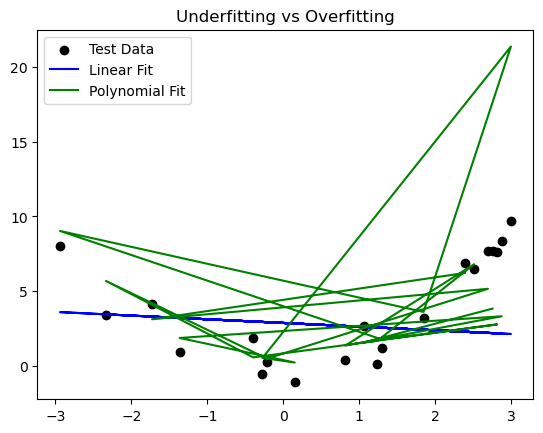

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

np.random.seed(1)
X = np.linspace(-3, 3, 100)
y = X**2 + np.random.normal(0, 1, 100)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear model (underfit)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# High-degree polynomial (overfit)
model_poly = make_pipeline(PolynomialFeatures(15), LinearRegression())
model_poly.fit(X_train, y_train)

plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.plot(X_test, model_linear.predict(X_test), label='Linear Fit', color='blue')
plt.plot(X_test, model_poly.predict(X_test), label='Polynomial Fit', color='green')
plt.legend()
plt.title("Underfitting vs Overfitting")
plt.show()


- **Underfitting** is when a model is too simplistic to capture the underlying pattern (such as using a straight line for data that is curved).
- **Overfitting** occurs when a model is overly complicated, overfitting the training data too tightly, including the noise.
This comparison visualizes both, depicting the impact that complexity has on test data performance.


In [33]:
# Question 8

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3*X.squeeze() + np.sin(X).squeeze() + np.random.normal(0, 0.5, 100)

# Linear
linear_model = LinearRegression().fit(X, y)
linear_preds = linear_model.predict(X)

# Polynomial
poly_model = make_pipeline(PolynomialFeatures(4), LinearRegression()).fit(X, y)
poly_preds = poly_model.predict(X)

# Lasso
lasso_model = Lasso(alpha=0.1).fit(X, y)
lasso_preds = lasso_model.predict(X)

print("MSE Linear:", mean_squared_error(y, linear_preds))
print("MSE Polynomial:", mean_squared_error(y, poly_preds))
print("MSE Lasso:", mean_squared_error(y, lasso_preds))


MSE Linear: 0.7070013302934997
MSE Polynomial: 0.3326407568289242
MSE Lasso: 0.7081775679172627


We compare three regression techniques:
- **Linear Regression**: Regresses a straight line.
- **Polynomial Regression**: Fitting a curved line (higher-degree polynomial).
- **Lasso Regression**: Incorporates complexity penalty to prevent overfitting.

Mean Squared Error (MSE) is employed to calculate the prediction error. Lower MSE means better performance on the data.


In [36]:
# Question 9

Pearson Correlation Coefficient: 0.9963338566823255


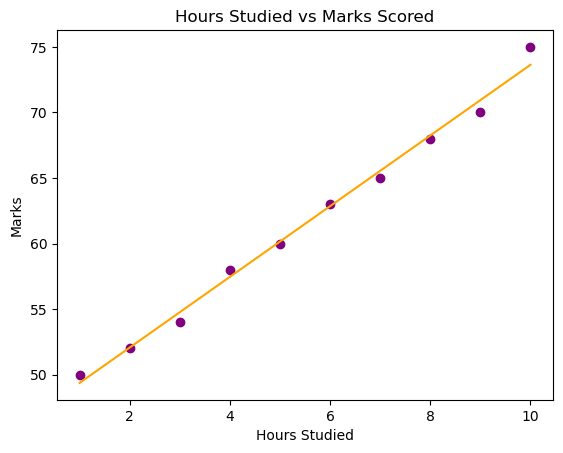

In [37]:
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
marks = np.array([50, 52, 54, 58, 60, 63, 65, 68, 70, 75])

correlation = np.corrcoef(hours, marks)[0, 1]
print("Pearson Correlation Coefficient:", correlation)

model_corr = LinearRegression().fit(hours.reshape(-1, 1), marks)
pred_marks = model_corr.predict(hours.reshape(-1, 1))

plt.scatter(hours, marks, color='purple')
plt.plot(hours, pred_marks, color='orange')
plt.title("Hours Studied vs Marks Scored")
plt.xlabel("Hours Studied")
plt.ylabel("Marks")
plt.show()


The **Pearson correlation coefficient** measures the strength and direction of a linear relationship between two variables.
- A value near +1 shows strong positive correlation (as one goes up, so does the other).
- Linear regression subsequently models the trend to forecast future values.
This illustration demonstrates that increased study hours correlate with better marks, as indicated by a high correlation and well-fitting regression line.